In [1]:
#import the required modules
import numpy as np
import cv2
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd
import time

from deepface import DeepFace

file_path = "C:/Users/erdem/Downloads/UTKFace/"

<a href="https://www.kaggle.com/datasets/jangedoo/utkface-new">Dataset</a>

In [2]:
def visualize(images):
    
    fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(8, 4))
    samples = images[:8]
    
    
    for i in range(8):
        img = plt.imread(f"{file_path}{samples[i]}")
        age = samples[i].split("_")[0]
        
        ax[i//4,i%4].set_title(f"age: {age}")
        ax[i//4,i%4].imshow(img)
        
        
    plt.tight_layout()
    

def read_data():
    
    return [f for f in listdir(file_path) if isfile(join(file_path, f))]
    

def analyze_deepface(images, detector, short=False, cut=1000):
    
    n_img = len(images)
    results = []

    for idx, image in enumerate(images):
        img = plt.imread(f"{file_path}{image}")

        # storing the result
        result = DeepFace.analyze(img, actions = ['age'], detector_backend=detector,
                                  enforce_detection=False, silent=True)
        
        results.append(result[0]["age"])
        
        if idx%100 == 0:
            if short:
                print(f"progress: {idx}/{cut}")
            else:
                print(f"progress: {idx}/{n_img}")
            
        if short and idx == (cut-1):
            break

    return results


def error(label, pred):
    
    n = len(pred)
    total_difference = 0
    
    for idx, p in enumerate(pred):
        total_difference += abs(p - label[idx])
            
    return total_difference / n

def report(labels, preds):

    cm = confusion_matrix(labels,preds)
 
    # Plot the confusion matrix.
    plt.figure(figsize=(6,5), dpi=120)
    sns.heatmap(cm, annot=True,
                xticklabels=["Man","Woman"],
                yticklabels=["Man","Woman"], fmt="g", cmap="Blues")

    plt.title("Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")

    print(classification_report(labels, preds))
    plt.show()

## Samples from the dataset

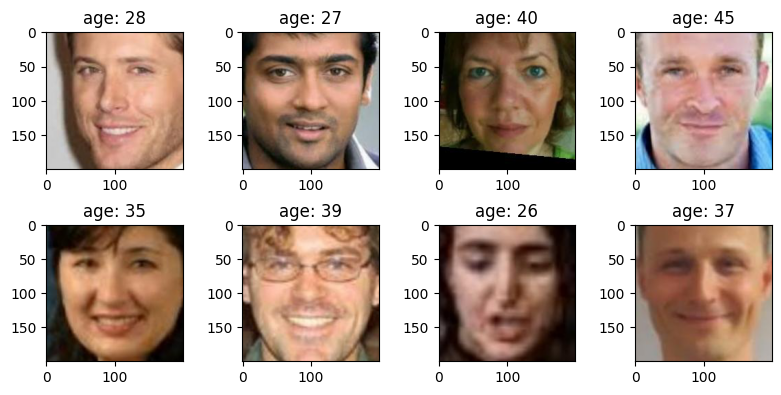

In [4]:
images = read_data()
np.random.shuffle(images)

visualize(images)

## Testing with three different face detectors

In [15]:
detectors = ["opencv", "mtcnn" ,"mediapipe"]
cut = 500

images = read_data()
np.random.shuffle(images)
labels = [int(i.split("_")[0]) for i in images[:cut]]


deepface_preds = {}
deepface_scores = {}
detector_times = {}

for detector in detectors:
    print(f"\n{detector} started!\n".upper())
    
    start = time.time()
    preds = analyze_deepface(images, detector, short=True, cut=cut)
    
    detector_times[detector] = time.time() - start
    deepface_preds[detector] = preds
    deepface_scores[detector] = error(labels, preds)


OPENCV STARTED!

progress: 0/500
progress: 100/500
progress: 200/500
progress: 300/500
progress: 400/500

MTCNN STARTED!

1/1 [==============================] - 0s 16ms/step
progress: 0/500
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
progress: 100/500
1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
progress: 200/500
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 3ms/step


1/1 [==============================] - 0s 5ms/step


1/1 [==============================] - 0s 21ms/step
progress: 300/500
1/1 [==============================] - 0s 4ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 34ms/step
progress: 400/500
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step

MEDIAPIPE STARTED!

progress: 0/500
progress: 100/500
progress: 200/500
progress: 300/500
progress: 400/500


### results of opencv and mediapipe with 2500 images 

In [16]:
deepface_scores

{'opencv': 12.99, 'mtcnn': 12.516, 'mediapipe': 12.892}

In [17]:
detector_times

{'opencv': 95.66259145736694,
 'mtcnn': 411.6881926059723,
 'mediapipe': 287.3192102909088}

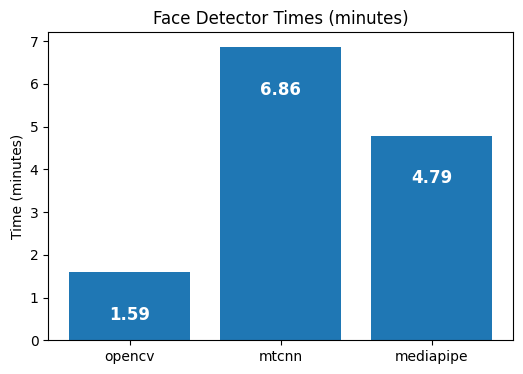

In [18]:
plt.figure(figsize=(6,4))

minutes = [s/60 for s in detector_times.values()]

plt.bar(detector_times.keys(), minutes)

plt.title("Face Detector Times (minutes)")
plt.ylabel("Time (minutes)")
for idx, value in enumerate(minutes):
    plt.text(idx, value-1, f"{value:.2f}", ha="center", va="center", fontsize="large", weight="bold", color="white")

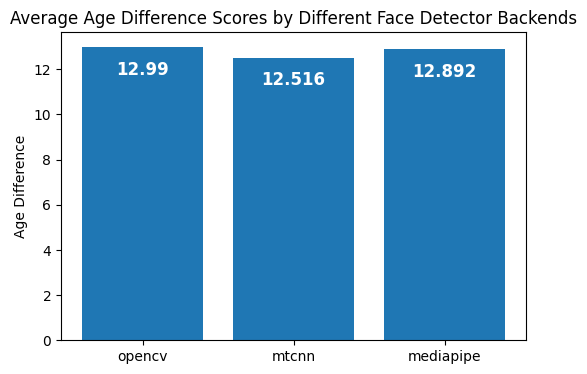

In [19]:
plt.figure(figsize=(6,4))

plt.bar(deepface_scores.keys(), deepface_scores.values())

plt.title("Average Age Difference Scores by Different Face Detector Backends")
plt.ylabel("Age Difference")

for idx, value in enumerate(deepface_scores.values()):
    plt.text(idx, value-1, f"{value}", ha="center", va="center", fontsize="large",weight="bold", color="white")